# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('/Users/akselostmoe/Skole/4. klasse høst 2021/maskinlæring/labs/lab1/data/mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [3]:
labels = data[:,0]
A = data[:,1:].transpose()
print(labels.shape, A.shape)
print(labels)


(20000,) (784, 20000)
[6. 5. 7. ... 2. 9. 5.]


Visualize the first 30 pictures with the corresponding labels

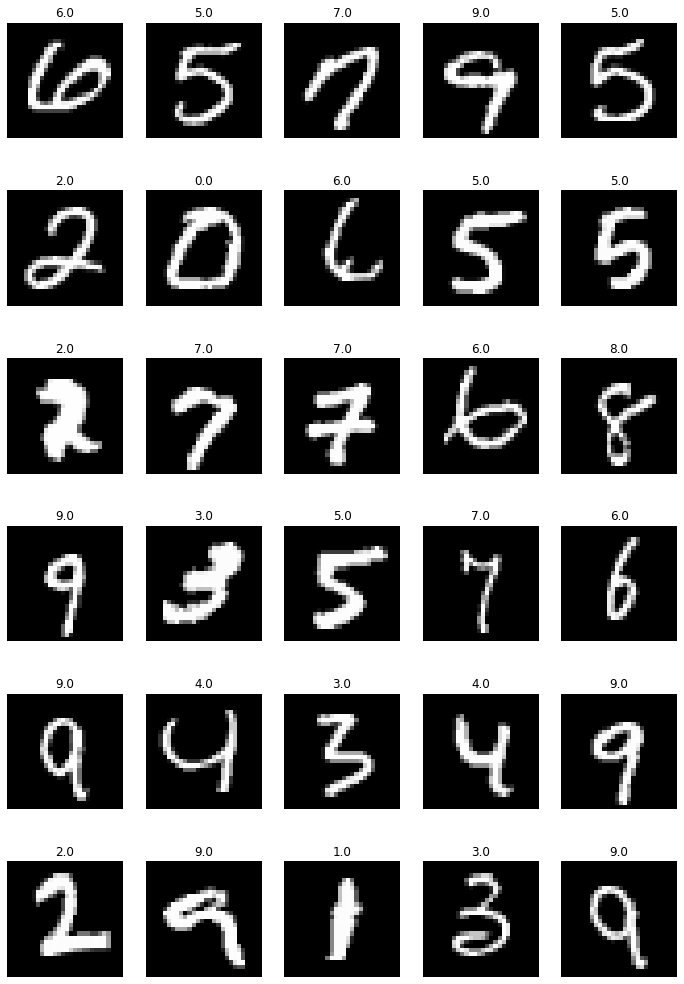

In [4]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(12,18))
axes = axes.reshape((-1,))
for i in range(30):
    image_i = A[:,i].reshape((28,28))
    axes[i].imshow(image_i, cmap="gray")
    axes[i].set_title(labels[i])
    axes[i].axis("off")

Visualize the first 30 pictures corresponding the the digit "2"

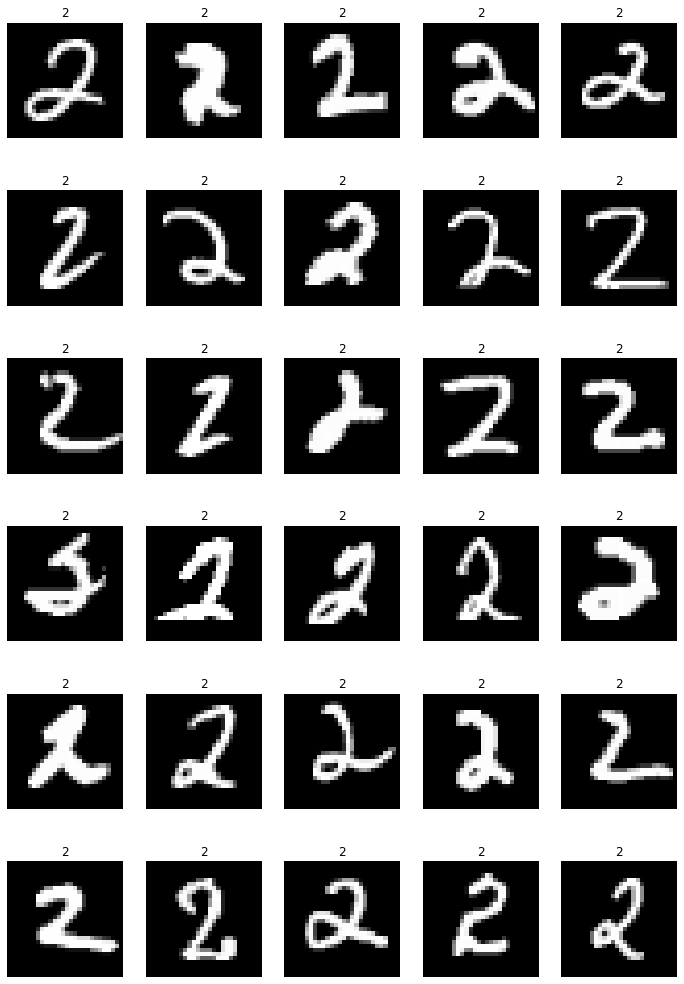

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(12,18))
axes = axes.reshape((-1,))
count = 0
i = 0
while count < 30:
    if int(labels[i] == 2):
        image_i = A[:,i].reshape((28,28))
        axes[count].imshow(image_i, cmap="gray")
        axes[count].set_title(int(labels[i]))
        axes[count].axis("off")
        count += 1
    i += 1

## Principal Component Analysis

### Whole dataset

Compute and visualize the average of the training data

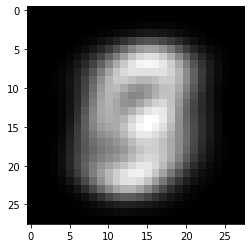

In [6]:
A_mean = np.mean(A, axis = 1)
plt.imshow(A_mean.reshape((28,28)), cmap = "gray")


Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

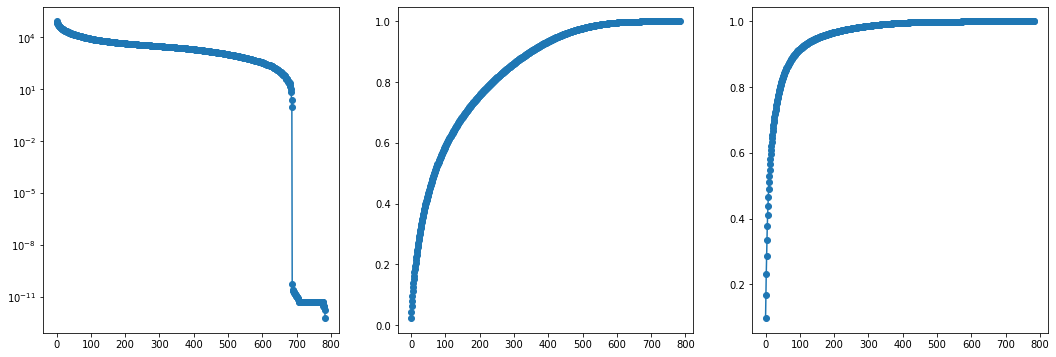

In [7]:
U, S, VT = np.linalg.svd(A - A_mean[:,None], full_matrices=False)
fig, axes = plt.subplots(nrows=1, ncols = 3, figsize = (18,6))
axes[0].semilogy(S, "o-")
axes[1].plot(np.cumsum(S)/np.sum(S), "o-")
axes[2].plot(np.cumsum(S**2)/np.sum(S**2), "o-")

Visualize the first 30 principal axes

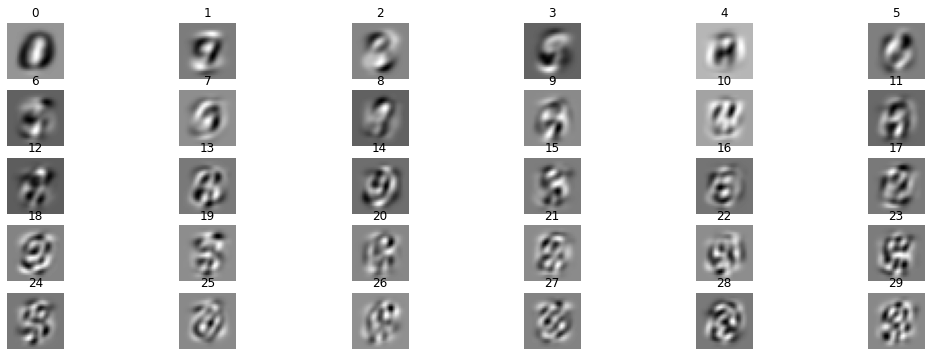

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,6))
axes = axes.reshape(-1,)
for i in range(30):
    image_i = U[:,i].reshape((28,28))
    axes[i].imshow(image_i, cmap = "gray")
    axes[i].set_title(str(i))
    axes[i].axis("off")


Compute the first two principal components corresponding to the first image

In [9]:
first_principal_component = np.inner((A[:,0] - A_mean), U[:,0])
second_principal_component = np.inner((A[:,0] - A_mean), U[:,1])
print(first_principal_component, second_principal_component)


-302.04575127640055 -12.674243621507543


Define a matrix corresponding all the principal components of all the images, and check the result of the previous point

In [10]:
corr_matrix = np.matmul(U.transpose(), A - A_mean[:,None])
print(corr_matrix[0,0])
print(corr_matrix[1,0])

-302.0457512764006
-12.674243621507584


Create a scatterplot for the first 2 principal components of all the training images, grouped by label.

'reshaped = labels.reshape(-1,)\n\nfor i in range(A.shape[1]):\n    x = np.inner(A[:,i], U[:,0])\n    y = np.inner(A[:,i], U[:,1])\n    if int(reshaped[i]) == 0:\n        col = "blue"\n    elif int(reshaped[i]) == 1:\n        col = "red"\n    elif int(reshaped[i]) == 2:\n        col = 3\n    elif int(reshaped[i]) == 3:\n        col = 4\n    elif int(reshaped[i]) == 4:\n        col = 5\n    elif int(reshaped[i]) == 5:\n        col = 6\n    elif int(reshaped[i]) == 6:\n        col = 7\n    elif int(reshaped[i]) == 7:\n        col = 8\n    elif int(reshaped[i]) == 8:\n        col = 9\n    elif int(reshaped[i]) == 9:\n        col = 10\n    plt.scatter(x,y,color = col)'

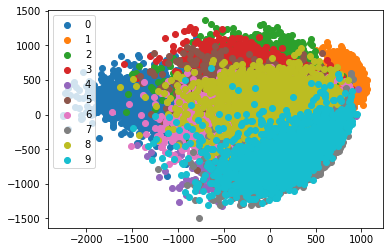

In [11]:
for i in range(10):
    plt.scatter(corr_matrix[0, labels == i], corr_matrix[1, labels == i], label = i)
plt.legend()

"""reshaped = labels.reshape(-1,)

for i in range(A.shape[1]):
    x = np.inner(A[:,i], U[:,0])
    y = np.inner(A[:,i], U[:,1])
    if int(reshaped[i]) == 0:
        col = "blue"
    elif int(reshaped[i]) == 1:
        col = "red"
    elif int(reshaped[i]) == 2:
        col = 3
    elif int(reshaped[i]) == 3:
        col = 4
    elif int(reshaped[i]) == 4:
        col = 5
    elif int(reshaped[i]) == 5:
        col = 6
    elif int(reshaped[i]) == 6:
        col = 7
    elif int(reshaped[i]) == 7:
        col = 8
    elif int(reshaped[i]) == 8:
        col = 9
    elif int(reshaped[i]) == 9:
        col = 10
    plt.scatter(x,y,color = col)"""

Repeat the previous point, by making a separate plot for each label

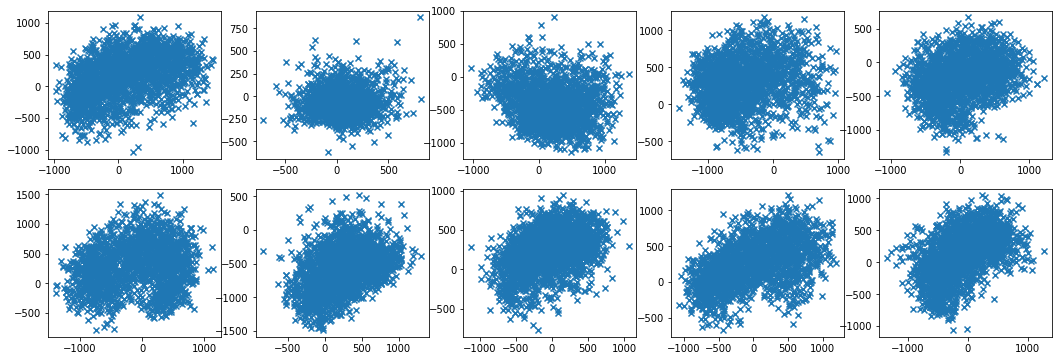

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,6))
axes = axes.reshape(-1,)
for i in range(10):
    axes[i].scatter(corr_matrix[0,labels == i], corr_matrix[1,labels == i], label = i, marker = "x")

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [59]:
reduced_data = A[:,(labels == 1) or labels == 9)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Plot the first 30 training images. 

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.